In [4]:
import os
import numpy as np
import cv2
import ast

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
LETTERS = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
SMALL_LETTERS = [x.lower() for x in LETTERS]
NUMBERS = ['0','1','2','3','4','5','6','7','8','9']
SYMBOLS = ['@','$','&',',','period','-']

In [8]:
# Import the data
#### This cell takes ~90s to execute (for color data)
#### This cell takes ~20s to execute (for gray data)

X = []
y = []

for letter in LETTERS:

    with open(fr".\Uppercase\{letter}\{letter}.txt", "r") as newfile:
        
        for i in range(35):
            target, data = newfile.readline().split("::")
            data = ast.literal_eval(data)
            y.append(target)
            X.append(data)

In [9]:
print(y[0])
print(np.array(y).shape)
print(np.array(y).ndim)
print(np.array(X).shape)
print(np.array(X).ndim)
print(type(X[0]))
# print(X[0])

A
(910,)
1
(910, 73, 73, 3)
4
<class 'list'>


In [24]:
# Trying to reshape the X-input data
X = np.array(X)
y = np.array(y)

X = X.reshape((910,-1))

In [25]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# print(y_test)
print(X_train.shape)
print(X_test[0])

(609, 15987)
[247 247 247 ... 254 254 254]


In [27]:
# Instantiate model object

logistic_model = LogisticRegression()

In [28]:
# Fit the model with training data

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Evaluate the model (with testing data)

predictions = logistic_model.predict(X_test)

In [30]:
# Evaluate the model
#### Need to assess predictions vs. y_test

classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           A       0.56      0.45      0.50        11\n           B       0.73      0.73      0.73        11\n           C       0.83      0.71      0.77        14\n           D       0.64      0.70      0.67        10\n           E       0.73      0.80      0.76        10\n           F       0.67      0.89      0.76         9\n           G       0.75      0.82      0.78        11\n           H       0.38      0.62      0.48         8\n           I       0.82      0.50      0.62        18\n           J       0.64      0.50      0.56        14\n           K       0.69      0.60      0.64        15\n           L       0.53      0.80      0.64        10\n           M       0.71      0.71      0.71        14\n           N       0.67      0.55      0.60        11\n           O       0.40      0.55      0.46        11\n           P       0.64      0.50      0.56        14\n           Q       0.75      0.50      0.60        12\n       

In [31]:
confusion_matrix(y_test, predictions)

array([[ 5,  0,  0,  0,  0,  0,  2,  2,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  7,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  2,  1, 

In [18]:
# Not sure how to interpret the above two reports...so we will instead use plots!

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.dpi"] = 150

<AxesSubplot:>

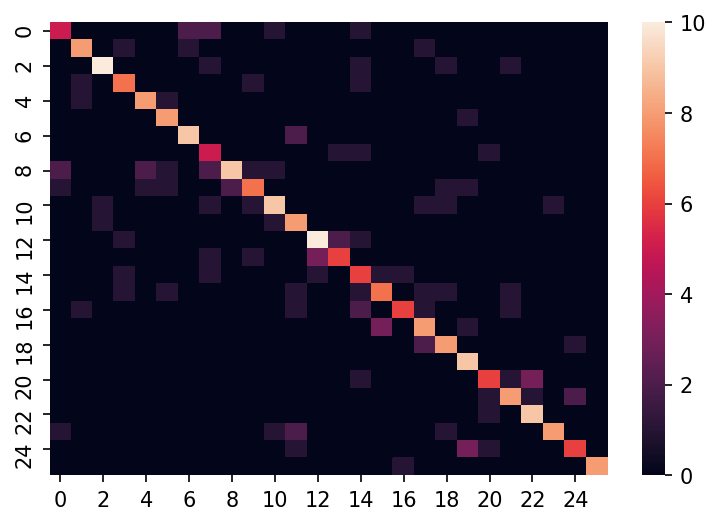

In [32]:
sns.heatmap(confusion_matrix(y_test,predictions))

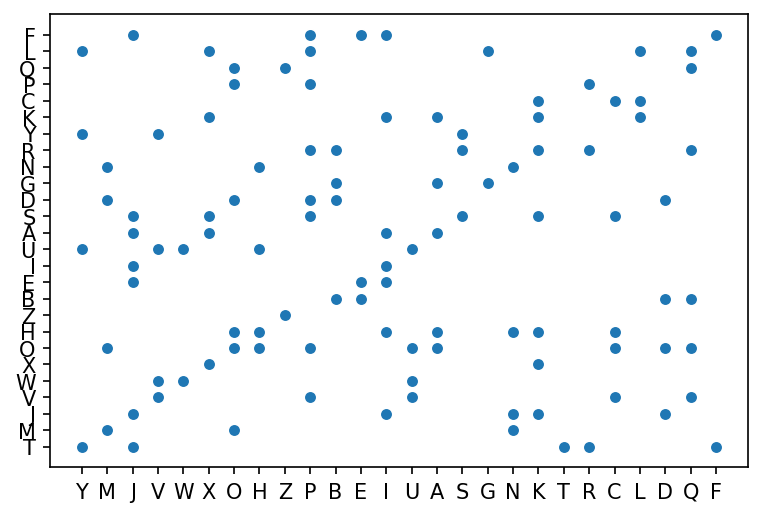

In [33]:
fig, axes = plt.subplots(1,1)

# axes.plot(y_test, predictions)

#### NOTE: The lines below only change the tick LABELS!!! They don't affect the data points!
# axes.set_xticklabels(LETTERS)
# axes.set_yticklabels(LETTERS)

ax = sns.scatterplot(x = y_test,
                y = predictions)
# ax.set_xlim(LETTERS)

In [34]:
y_test

array(['Y', 'M', 'J', 'V', 'W', 'X', 'O', 'H', 'Z', 'V', 'P', 'Z', 'B',
       'E', 'I', 'U', 'A', 'M', 'S', 'O', 'I', 'G', 'G', 'N', 'N', 'X',
       'K', 'T', 'T', 'I', 'B', 'N', 'G', 'U', 'J', 'S', 'R', 'A', 'J',
       'O', 'G', 'K', 'B', 'C', 'V', 'G', 'I', 'C', 'K', 'L', 'V', 'S',
       'N', 'R', 'H', 'C', 'D', 'D', 'W', 'P', 'Y', 'B', 'U', 'P', 'H',
       'E', 'Z', 'O', 'Z', 'J', 'M', 'W', 'Q', 'U', 'J', 'M', 'Y', 'I',
       'U', 'B', 'M', 'F', 'I', 'D', 'B', 'J', 'H', 'N', 'D', 'T', 'G',
       'U', 'H', 'I', 'M', 'Q', 'X', 'C', 'H', 'I', 'E', 'G', 'L', 'X',
       'J', 'R', 'Y', 'Q', 'V', 'Q', 'G', 'I', 'G', 'T', 'I', 'W', 'Q',
       'P', 'Z', 'C', 'V', 'D', 'J', 'R', 'P', 'H', 'J', 'C', 'F', 'F',
       'E', 'I', 'R', 'O', 'O', 'B', 'K', 'S', 'T', 'J', 'X', 'K', 'I',
       'B', 'S', 'S', 'W', 'I', 'Z', 'I', 'N', 'A', 'A', 'T', 'L', 'O',
       'Z', 'D', 'C', 'K', 'F', 'C', 'J', 'M', 'G', 'O', 'Y', 'P', 'A',
       'B', 'P', 'R', 'J', 'T', 'C', 'U', 'V', 'Q', 'Y', 'M', 'W

In [35]:
predictions

array(['T', 'M', 'J', 'V', 'W', 'X', 'O', 'H', 'Z', 'W', 'V', 'Z', 'B',
       'E', 'I', 'U', 'A', 'M', 'S', 'D', 'J', 'G', 'G', 'H', 'N', 'X',
       'R', 'T', 'T', 'I', 'D', 'N', 'G', 'U', 'I', 'Y', 'R', 'G', 'S',
       'M', 'G', 'K', 'B', 'C', 'V', 'G', 'I', 'C', 'X', 'K', 'V', 'S',
       'M', 'R', 'N', 'C', 'B', 'O', 'U', 'P', 'Y', 'B', 'O', 'P', 'U',
       'E', 'Z', 'O', 'Q', 'T', 'M', 'W', 'L', 'U', 'J', 'M', 'T', 'F',
       'W', 'B', 'O', 'F', 'H', 'D', 'B', 'E', 'H', 'N', 'J', 'T', 'G',
       'U', 'H', 'A', 'M', 'Q', 'X', 'C', 'H', 'I', 'E', 'G', 'C', 'L',
       'J', 'P', 'T', 'Q', 'Y', 'Q', 'G', 'I', 'G', 'T', 'I', 'W', 'R',
       'P', 'Z', 'H', 'V', 'D', 'J', 'T', 'S', 'O', 'J', 'C', 'F', 'T',
       'E', 'K', 'R', 'O', 'P', 'B', 'K', 'R', 'T', 'I', 'X', 'K', 'I',
       'R', 'R', 'S', 'W', 'A', 'Z', 'E', 'N', 'A', 'A', 'T', 'L', 'O',
       'Z', 'D', 'C', 'C', 'F', 'C', 'A', 'M', 'L', 'O', 'Y', 'P', 'G',
       'B', 'P', 'R', 'J', 'T', 'C', 'V', 'Y', 'V', 'Y', 'N', 'W

In [36]:
# Manually determine percent accuracy
count=0
for i in range(len(y_test)):
    if y_test[i] == predictions[i]:
        count+=1

percent = count/len(y_test) * 100
print("Number of predictions made: ", len(y_test))
print("Number correct: ", count)
print("Percentage correct: ", round(percent, 2), "%")

Number of predictions made:  301
Number correct:  198
Percentage correct:  65.78 %
